## IEEE - CIS Fraud Detection Kaggle Competition
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
data_path = os.getcwd() + '/data'

In [3]:
transaction = pd.read_csv(data_path + '/train_transaction.csv', na_values = ' ')
identity = pd.read_csv(data_path + '/train_identity.csv', na_values = ' ')

### Merging the two separate datasets (transaction, identity)

In [4]:
df = pd.merge(transaction, identity, how = 'outer')

### Summary statistics + glimpse into the dataset(s)

In [5]:
transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [28]:
print('Columns with missing values:', df.isnull().any().sum())

Columns with missing values: 414


### Visualization of selected variables

Text(0, 0.5, 'count')

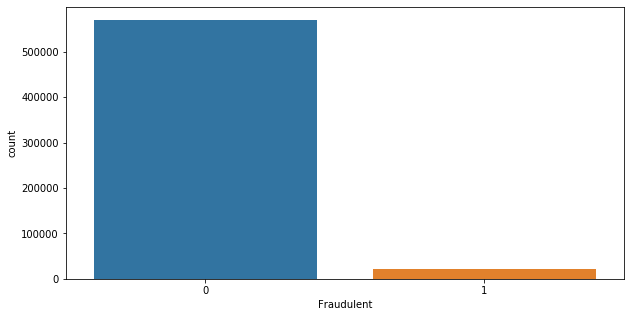

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(transaction['isFraud'])
plt.xlabel('Fraudulent')
plt.ylabel('count')

As is usually the case, we have an incredibly imbalanced dataset, which will affect the algorithms. Therefore, we have to stress the importance of the fraudulent cases.

In [12]:
cnt = {x:0 for x in range(2)}

In [13]:
for i in transaction['isFraud']:
    cnt[i] += 1

In [14]:
cnt

{0: 569877, 1: 20663}

Only 20663 cases of fraudulent transactions; around 3% of the whole dataset

Text(0, 0.5, 'count')

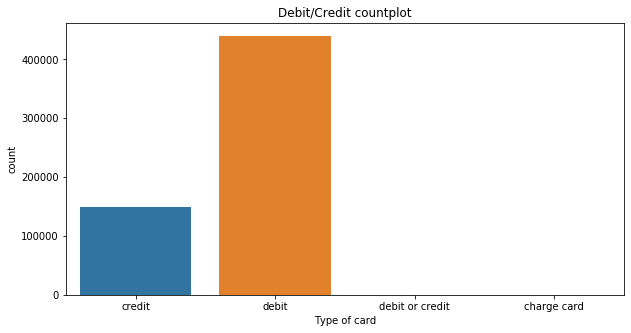

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(transaction['card6'])
plt.title('Debit/Credit countplot')
plt.xlabel('Type of card')
plt.ylabel('count')

Most of the transactions were performed using the debit card

In [29]:
print('Credit:', len(transaction[transaction['card6'] == 'credit']))
print('Debit:', len(transaction[transaction['card6'] == 'debit']))
print('Debit or credit:', len(transaction[transaction['card6'] == 'debit or credit']))
print('Charge card:', len(transaction[transaction['card6'] == 'charge card']))

Credit: 148986
Debit: 439938
Debit or credit: 30
Charge card: 15


Text(0, 0.5, 'count')

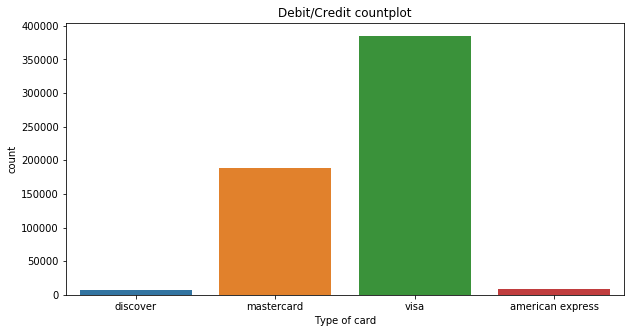

In [10]:
plt.figure(figsize = (10,5))
sns.countplot(transaction['card4'])
plt.title('Debit/Credit countplot')
plt.xlabel('Type of card')
plt.ylabel('count')

Visa is the most frequent card provider.

Text(0, 0.5, 'Count')

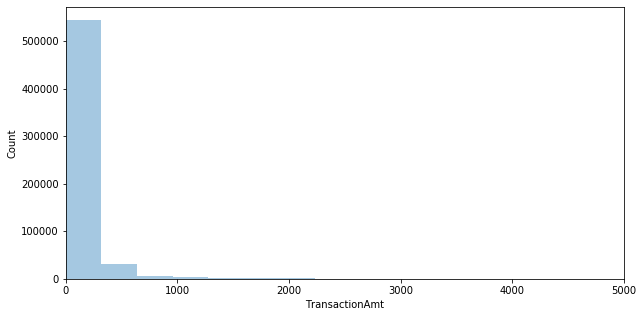

In [15]:
plt.figure(figsize = (10,5))
sns.distplot(df['TransactionAmt'], bins = 100, kde = False)
plt.xlim(0,5000)
plt.ylabel('Count')

Text(0.5, 1.0, 'Recipient email address')

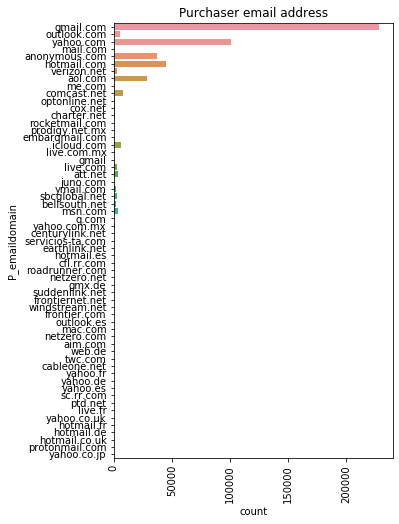

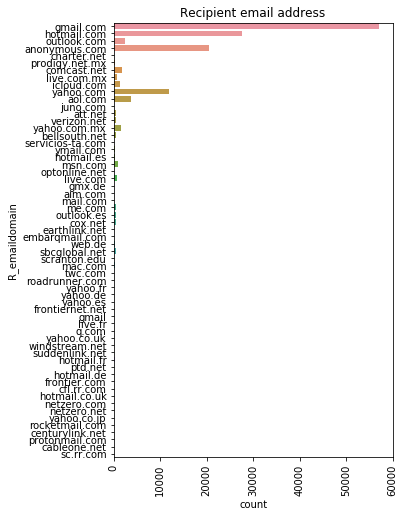

In [43]:
plt.figure(figsize = (5, 8))
ax = plt.subplot()
sns.countplot(y = df['P_emaildomain'])
plt.xticks(rotation = 90)
plt.title('Purchaser email address')

plt.figure(figsize = (5, 8))
ax = plt.subplot()
sns.countplot(y = df['R_emaildomain'])
plt.xticks(rotation = 90)
plt.title('Recipient email address')

Most frequently used e-mail address is gmail.com

### A closer look at fraudulent transactions

In [44]:
frauds = df[df['isFraud'] == 1]

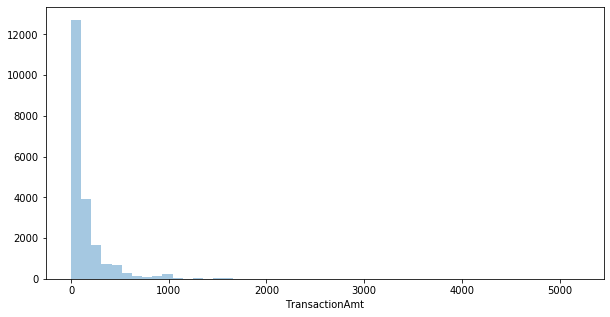

In [45]:
plt.figure(figsize = (10,5))
sns.distplot(frauds['TransactionAmt'], kde = False)

Nothing surprising here. Most of the frauds are for relatively small amounts of money. There is, however, one outlier. Someone paid/withdrawn 5191 USD

In [46]:
print('Mean amount of fraudulent transactions:', frauds['TransactionAmt'].mean())
print('Maximum amount of a fraudulent transaction:', frauds['TransactionAmt'].max())

Mean amount of fraudulent transactions: 149.24477858974976
Maximum amount of a fraudulent transaction: 5191.0


Text(0.5, 1.0, 'Debit/Credit')

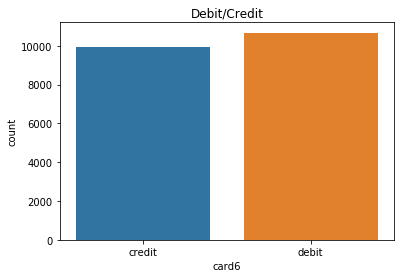

In [47]:
sns.countplot(frauds['card6'])
plt.title('Debit/Credit')

Most of the ``fraudulent`` transactions were "performed" through debit cards

The most frequent card provider in the fraudulent transactions was Visa. Keep in mind though that it is also the most frequent card provider for the whole dataset, so it was to be expected.

Text(0.5, 1.0, 'Card Provider')

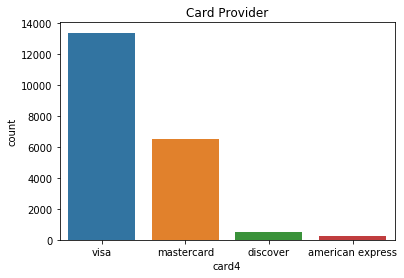

In [48]:
sns.countplot(frauds['card4'])
plt.title('Card Provider')

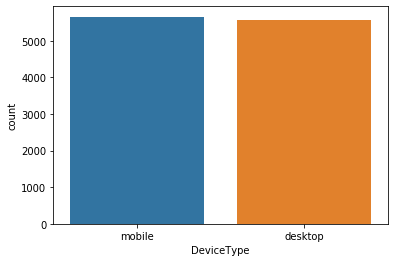

In [49]:
sns.countplot(frauds['DeviceType'])

mobile outweighs desktop, but a lot of the information is missing (NaN values)

In [23]:
def numeric_vars(df):
    num_vars = []
    for i in df:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            num_vars.append(i)
        
    return num_vars

In [24]:
numerics = numeric_vars(df)
numerics.pop(1)

'isFraud'

In [25]:
df_subset = df[numerics]
df_subset

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,2987000,86400,68.50,13926,NaN,150.0,142.0,315.0,87.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.00,2755,404.0,150.0,102.0,325.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.00,4663,490.0,150.0,166.0,330.0,87.0,287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.00,18132,567.0,150.0,117.0,476.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.00,4497,514.0,150.0,102.0,420.0,87.0,NaN,...,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,15811047,49.00,6550,NaN,150.0,226.0,272.0,87.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,15811049,39.50,10444,225.0,150.0,224.0,204.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,15811079,30.95,12037,595.0,150.0,224.0,231.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,15811088,117.00,7826,481.0,150.0,224.0,387.0,87.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
